In [98]:
import numpy as np
import matplotlib.pyplot as plt

First we want to generate the matrix A, we define a function to generate it

In [107]:
def matrix_a(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i==j:
                A[i][j] = 2
            elif i == j - 1 or i == j + 1:
                A[i][j] = -1
    return A


def jacobi(A, b, x_init, epsilon = 1e-10, max_iterations = 10000):
    iteration = 0
    D = np.diag(np.diag(A))
    LU = A - D
    x = x_init
    for i in range(max_iterations):
        iteration = iteration + 1
        D_inv = np.diag(1/np.diag(D))
        x_new = np.dot(D_inv, b - np.dot(LU, x))
        if np.linalg.norm(x_new - x) < epsilon:
            break
            return x_new, iteration
        x = x_new
    return x_new, iteration

In [108]:
N = 5
A = matrix_a(N)
x_a = np.random.normal(size = (N,1))
b = np.dot(A, x_a)
x_init = np.zeros(len(b))
x, iteration = jacobi(A, b, x_init)
print(x_a)
print(x)
print(iteration)

[[ 0.12858428]
 [-0.18368701]
 [-1.07486265]
 [ 0.93126061]
 [-0.45162685]]
[[ 0.12858428  0.12858428  0.12858428  0.12858428  0.12858428]
 [-0.18368701 -0.18368701 -0.18368701 -0.18368701 -0.18368701]
 [-1.07486265 -1.07486265 -1.07486265 -1.07486265 -1.07486265]
 [ 0.93126061  0.93126061  0.93126061  0.93126061  0.93126061]
 [-0.45162685 -0.45162685 -0.45162685 -0.45162685 -0.45162685]]
172


[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]
[ 174.  230.  297.  394.  479.  559.  647.  816.  989. 1150. 1193. 1464.
 1558. 1798. 1985. 2265. 2451. 2559. 2827. 3232. 3234. 3752. 3971. 4375.
 4692. 5034. 5415. 5288. 5836. 6141. 6089. 6287. 7413. 7987. 7976.]


Text(0.5, 1.0, 'n-iteration')

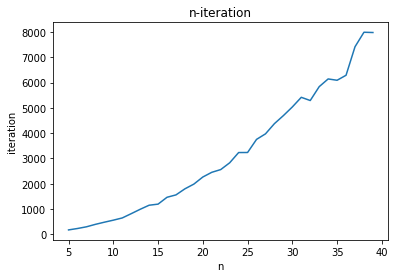

In [113]:
n_test = np.array([i for i in range(5, 40)])
print(n_test)
iteration_test = np.zeros(len(n_test))
for n in n_test:
    A = matrix_a(n)
    x_a = np.random.normal(size = (n,1))
    b = np.dot(A, x_a)
    x_init = np.zeros(len(b))
    x, iteration = jacobi(A, b, x_init)
    iteration_test[n-5] = iteration
print(iteration_test)
plt.plot(n_test, iteration_test)
plt.xlabel('n')
plt.ylabel('iteration')
plt.title('n-iteration')